In [340]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from tqdm.notebook import tqdm



In [341]:
numcards = ['2', '3', '4', '5', '6', '7', '8', '9', '10']
opcards1 = ['+', '-', '/', '*', '']
opcards2 = ['+', '-', '/', '*']

Primelist = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]
Fibolist = [2, 3, 5, 8, 13, 21, 34, 55, 89]
SqubeList = [1, 2, 4, 8, 9, 16, 25, 27, 36, 49, 64, 81, 100]

Triggered = {"Prime": 0, "Fibo":0, "Sqube" : 0, '789AND': 0, '789OR': 0}
Scores = {"Prime":[],"Fibo":[],"Sqube":[], '789AND':[], '789OR':[]}

prevanswer = 0

In [342]:


def numextract(str):
    
    exp=str
    
    for symbol in opcards2:
        exp = exp.replace(symbol, ',')
    
    return exp.split(',')



In [343]:
def exprgen(numlimit):
    answer = 0
    while answer<1 or answer>100:   #critical point: cap range; right now its 1 to 100 inclusive
        op = '0'
        expr = ''

        for i in range(numlimit):
            num = random.choice(numcards)
            expr += num
                
            if i < (numlimit-1):
                if num == '10' or op == '':
                    op = random.choice(opcards2)
                else:
                    op = random.choice(opcards1)    
                expr += op
        answer = int(eval(expr)) 
    return expr


In [344]:

def primes(val, numberlist):
    
    primemult = 0
    if val in Primelist:
        Triggered['Prime'] += 1
        primemult = sum(1 for num in numberlist if num in Primelist)
        Scores['Prime'].append(val*primemult)


In [345]:
def fibos (preval, val, numberlist):
    fibotrigger = sum(1 for num in numberlist if num in Fibolist)
    
    if fibotrigger>1:     # critical point : how many fibos required to trigger; right now its one.
        Triggered ['Fibo'] += 1
        Scores['Fibo'].append(val + preval)

In [346]:
def squbes (val, numlist):
    digsum = 0
    for num in numlist:
      if num in SqubeList:
        digsum += num//10 + num%10 
    
    if digsum > 0:
        Triggered['Sqube'] += 1
        Scores['Sqube'].append(val+digsum)

In [347]:
def sevenatenineand(val, numlist):
    if 7 in numlist and 8 in numlist and 9 in numlist:
        Triggered['789AND'] += 1
        Scores['789AND'].append(2*val)

In [ ]:
def sevenatenineor(val, numlist):
    if 7 in numlist or 8 in numlist or 9 in numlist:
        Triggered['789OR'] += 1
        Scores['789OR'].append(val*2)

In [349]:
for i in range(100000):      #critical point: the number of sims to run     #also, run collective simualtions or five turns each with preval resetting at start of each turn
    expr = (exprgen(4))    #critical point: the numbers in the expression generate: right now 4   (should do them for 3 aswell)
    answer = int(eval(expr))
    nums = [int(x) for x in numextract(expr)]
    fibos(prevanswer,answer, nums)
    primes(answer, nums)
    squbes(answer, nums)
    sevenatenineand(answer, nums)
    sevenatenineor(answer, nums)
    prevanswer = answer


#have to collect the data in pandas and analyze
#have to plot curves using numpy, matplotlib


In [350]:
pd.DataFrame.from_dict(Scores, orient='index')


Exception ignored in: <function tqdm.__del__ at 0x00000250C81F1080>
Traceback (most recent call last):
  File "c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\std.py", line 1148, in __del__
    self.close()
  File "c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\notebook.py", line 279, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


,0,1,2,3,4,5,6,7,8,9,...,82275,82276,82277,82278,82279,82280,82281,82282,82283,82284
Prime,46,4,46,33,4,19,17,94,14,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fibo,27,117,50,18,29,34,23,61,36,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sqube,66,38,25,117,31,25,25,17,13,22,...,44.0,44.0,98.0,8.0,31.0,30.0,68.0,43.0,34.0,80.0
789AND,32,14,144,26,150,6,26,144,2,140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
789OR,44,21,6,90,16,2,6,12,2,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [351]:

pd.DataFrame.from_dict(Triggered, orient='index')

,0
Prime,31216
Fibo,45936
Sqube,82285
789AND,1571
789OR,69483


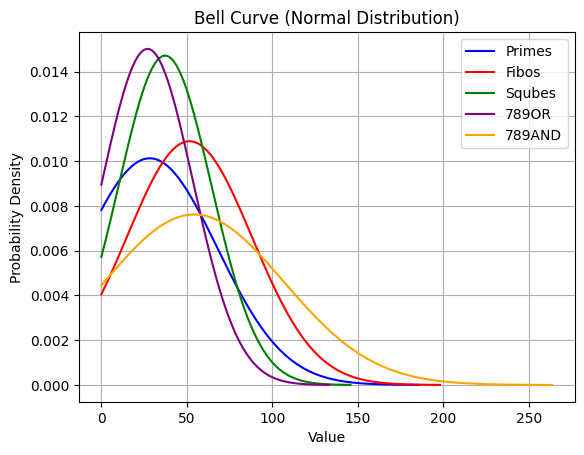

In [352]:
mean = np.mean(Scores['Prime'])
std = np.std(Scores['Prime'])
x = np.linspace(0, mean + 4 * std, 1000)
values= norm.pdf(x, mean, std)
plt.plot(x, values, color='blue', label='Primes')

mean = np.mean(Scores['Fibo'])
std = np.std(Scores['Fibo'])
x = np.linspace(0, mean + 4 * std, 1000)
values= norm.pdf(x, mean, std)
plt.plot(x, values, color='red', label='Fibos')

mean = np.mean(Scores['Sqube'])
std = np.std(Scores['Sqube'])
x = np.linspace(0, mean + 4 * std, 1000)
values= norm.pdf(x, mean, std)
plt.plot(x, values, color='green', label='Squbes')

mean = np.mean(Scores['789OR'])
std = np.std(Scores['789OR'])
x = np.linspace(0, mean + 4 * std, 1000)
values= norm.pdf(x, mean, std)
plt.plot(x, values, color='purple', label='789OR')

mean = np.mean(Scores['789AND'])
std = np.std(Scores['789AND'])
x = np.linspace(0, mean + 4 * std, 1000)
values= norm.pdf(x, mean, std)
plt.plot(x, values, color='orange', label='789AND')

plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Bell Curve (Normal Distribution)')
plt.grid(True)
plt.legend()
plt.show()

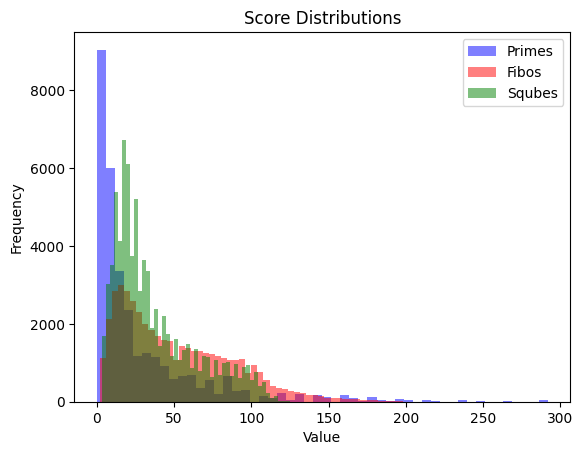

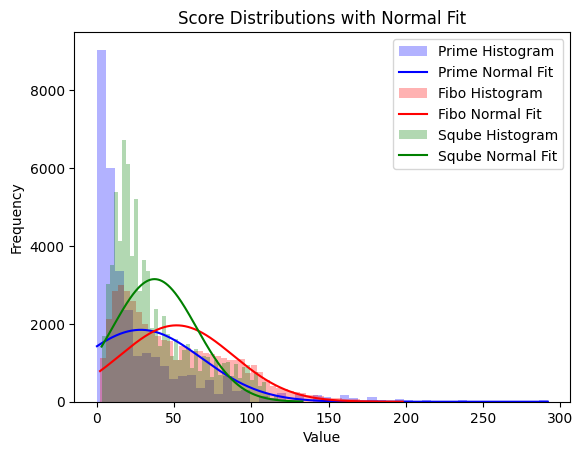

In [353]:
plt.hist(Scores['Prime'], bins=50, color='blue', alpha=0.5, label='Primes')
plt.hist(Scores['Fibo'], bins=50, color='red', alpha=0.5, label='Fibos')
plt.hist(Scores['Sqube'], bins=50, color='green', alpha=0.5, label='Squbes')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Score Distributions')
plt.legend()
plt.show()
for key, color in zip(['Prime', 'Fibo', 'Sqube'], ['blue', 'red', 'green']):
    data = Scores[key]
    mean = np.mean(data)
    std = np.std(data)
    x = np.linspace(min(data), max(data), 1000)
    plt.hist(data, bins=50, color=color, alpha=0.3, label=f'{key} Histogram')
    plt.plot(x, norm.pdf(x, mean, std)*len(data)*np.diff(np.histogram(data, bins=50)[1])[0], color=color, label=f'{key} Normal Fit')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Score Distributions with Normal Fit')
plt.legend()
plt.show()